In [1]:
# Base Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [28]:
# /content/drive/My Drive/fer2013.csv
def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)


def cost(Y, Yp):
    return -(Y*np.log(Yp)).sum()


def errorRate(Y, Yp):
    return np.mean(Y != Yp)


def oneZeroEncoding(y):
    N = len(y)
    K = len(set(y))
    
    index = np.zeros(shape=(N, K), dtype=int)
    
    for i, value in enumerate(y):
        index[i, value] = 1
        
    return index


def getData(balance_ones=True, Ntest=1000):
    # images are 48x48 = 2304 size vectors
    Y = []
    X = []
    first = True
    for line in open('/home/mrz/MyDrive/Education/Deep-Learning/Codes/LogisticRegression/facial-expression-recognition/fer2013/fer2013.csv'):
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])

    X, Y = np.array(X) / 255.0, np.array(Y)

    # shuffle and split
    X, Y = shuffle(X, Y)
    Xtrain, Ytrain = X[:-Ntest], Y[:-Ntest]
    Xvalid, Yvalid = X[-Ntest:], Y[-Ntest:]

    if balance_ones:
        # balance the 1 class
        X0, Y0 = Xtrain[Ytrain!=1, :], Ytrain[Ytrain!=1]
        X1 = Xtrain[Ytrain==1, :]
        X1 = np.repeat(X1, 9, axis=0)
        Xtrain = np.vstack([X0, X1])
        Ytrain = np.concatenate((Y0, [1]*len(X1)))

    return Xtrain, Ytrain, Xvalid, Yvalid


In [23]:
Xtrain, Ytrain, Xvalid, Yvalid = getData()

In [24]:
Ytrain.shape

(39095,)

In [25]:
Xvalid.shape

(1000, 2304)

In [26]:
d = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0,}

for c in Ytrain:
    d[c] += 1
    
print(d)

{0: 4817, 1: 4734, 2: 4983, 3: 8734, 4: 5914, 5: 3895, 6: 6018}


In [30]:
oneZeroEncoding(Ytrain).shape

(39095, 7)

In [102]:
class Model:
    def fit(self, X, Y, Xtest, Ytest, lr=1e-3, epochs=1000):
        N, D = X.shape
        K = len(set(Y))
        
        Y = oneZeroEncoding(Y)
        Ytest = oneZeroEncoding(Ytest)
        
        self.W = np.random.randn(D, K)
        self.b = np.zeros(K)
        
        costs = []
        for i in range(epochs):
            pY = self.forward(X)
            
            self.W -= lr * ( X.T @ (pY - Y) )
            self.b -= lr * (pY-Y).sum()
            
            if i%10 == 0:
                pYtest = self.forward(Xtest)
                c = cost(Ytest, pYtest)
                e = errorRate(np.argmax(Ytest, axis=1), np.argmax(pYtest, axis=1))
                
                print('Cost: {}, Error: {}, Epoch {}'.format(c, e, i))
                
                costs.append(c)
                
        ###
        plt.plot(costs)
        plt.show()
    
    def forward(self, X):
        return softmax( (X@self.W) + self.b )
    
    def predict(self, X):
        Yp = self.forward(X)
        return np.argmax(Yp, axis=1)
    
    def accuracy(self, X, Y):
        prediction = self.predict(X)
        return 1-errorRate(Y, prediction)
        

In [103]:
model = Model()

Cost: 17836.00439856277, Error: 0.888, Epoch 0
Cost: 14087.593547932474, Error: 0.888, Epoch 10
Cost: 11905.551711031914, Error: 0.89, Epoch 20
Cost: 10315.446355765755, Error: 0.886, Epoch 30
Cost: 9086.08395362668, Error: 0.884, Epoch 40
Cost: 8107.695078695567, Error: 0.894, Epoch 50
Cost: 7315.395458196796, Error: 0.882, Epoch 60
Cost: 6731.837698050061, Error: 0.876, Epoch 70
Cost: 6439.483084304024, Error: 0.876, Epoch 80
Cost: 6336.152488265447, Error: 0.87, Epoch 90
Cost: 6291.8766396117735, Error: 0.866, Epoch 100
Cost: 6263.32551173478, Error: 0.866, Epoch 110
Cost: 6239.949028348363, Error: 0.866, Epoch 120
Cost: 6218.749758401313, Error: 0.866, Epoch 130
Cost: 6198.637634637527, Error: 0.866, Epoch 140
Cost: 6179.144657458932, Error: 0.866, Epoch 150
Cost: 6160.050866657205, Error: 0.866, Epoch 160
Cost: 6141.246856500578, Error: 0.868, Epoch 170
Cost: 6122.675695886973, Error: 0.87, Epoch 180
Cost: 6104.306380429471, Error: 0.87, Epoch 190
Cost: 6086.121094949934, Error: 0

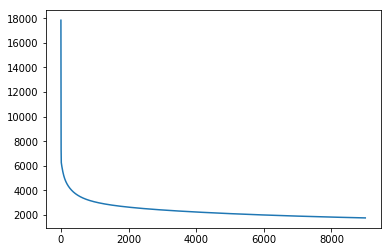

In [104]:
model.fit(Xtrain, Ytrain, Xtest, Ytest, lr=1e-7, epochs=90000)

In [105]:
model.predict(Xtest)

array([5, 2, 2, 1, 3, 5, 0, 6, 3, 3, 5, 6, 5, 4, 4, 3, 0, 1, 5, 4, 0, 6,
       2, 3, 3, 0, 3, 5, 3, 1, 6, 5, 4, 4, 4, 1, 6, 3, 3, 6, 1, 3, 2, 4,
       2, 3, 1, 6, 3, 4, 3, 1, 4, 4, 1, 4, 3, 3, 3, 2, 4, 4, 4, 3, 6, 4,
       3, 2, 2, 0, 2, 3, 0, 0, 4, 3, 0, 1, 3, 2, 6, 3, 5, 3, 3, 6, 3, 0,
       3, 4, 0, 0, 4, 0, 0, 0, 5, 2, 1, 3, 5, 3, 4, 0, 0, 5, 3, 4, 4, 3,
       5, 6, 0, 1, 3, 0, 3, 3, 6, 3, 4, 6, 5, 4, 2, 2, 5, 0, 3, 1, 2, 3,
       3, 2, 2, 2, 2, 5, 6, 0, 4, 4, 5, 2, 4, 3, 5, 0, 5, 5, 2, 3, 3, 6,
       3, 3, 0, 6, 4, 3, 6, 6, 3, 3, 3, 0, 0, 2, 2, 6, 6, 6, 2, 4, 6, 2,
       6, 3, 3, 3, 3, 1, 1, 1, 3, 0, 4, 6, 6, 3, 4, 3, 3, 0, 2, 6, 6, 6,
       6, 2, 5, 1, 6, 4, 6, 0, 5, 4, 6, 6, 3, 5, 3, 6, 5, 0, 0, 6, 4, 5,
       4, 4, 3, 4, 5, 5, 4, 5, 5, 2, 5, 1, 3, 1, 6, 3, 3, 1, 6, 0, 3, 5,
       2, 3, 0, 0, 0, 3, 6, 0, 0, 1, 0, 3, 6, 2, 1, 2, 4, 1, 5, 0, 0, 4,
       1, 0, 1, 2, 6, 3, 2, 3, 2, 6, 3, 3, 3, 4, 6, 0, 5, 4, 3, 1, 1, 6,
       5, 4, 6, 6, 6, 4, 4, 0, 5, 6, 6, 4, 4, 4, 6,

In [106]:
model.accuracy(Xtest, Ytest)

0.242